In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import urllib.request

### 使用Numpy创建向量和矩阵

In [5]:
# --- Creating a 1D array (Vector) from a Python list ---
# A vector in linear algebra is a 1D array.
v = np.array([1, 5, 2])
print("Vector v:")
print(v)
print("-" * 20)

# --- Creating a 2D array (Matrix) from a list of lists ---
# A matrix is a 2D array. Each inner list corresponds to a row.
M = np.array([[1, 2, 3], [4, 5, 6]])
print("Matrix M:")
print(M)
print("-" * 20)

# A frequent error is to pass multiple arguments instead of a single list.
# The following line will cause a TypeError:
# wrong_array = np.array(1, 2, 3) 

# --- Using helper functions to create arrays with placeholder data ---



Vector v:
[1 5 2]
--------------------
Matrix M:
[[1 2 3]
 [4 5 6]]
--------------------
3x4 Matrix of zeros:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
--------------------
2x3 Matrix of ones:
[[1. 1. 1.]
 [1. 1. 1.]]
--------------------
Inspecting vector v:
v = [1 5 2]
Shape of v: (3,)
Number of dimensions of v: 1
Size of v (total elements): 3
--------------------
Inspecting matrix M:
M = 
[[1 2 3]
 [4 5 6]]
Shape of M: (2, 3)
Number of dimensions of M: 2
Size of M (total elements): 6


Create a 3x3 matrix with random values from a uniform distribution over | `np.array([[1, 2], [3, 4]])` |
| `np.zeros()` | Create an array of a given shape, filled with zeros. [5, 31] | `np.zeros((2, 3))` |
| `np.ones()` | Create an array of a given shape, filled with ones. [8, 32] | `np.ones((4, 2))` |
| `np.random.rand()` | Create an array of a given shape, filled with random values from a uniform distribution over [0, 1). [31, 33] | `np.random.rand(3, 3)` |

In [7]:
# Create a 3x4 matrix filled with zeros.
# The shape is passed as a tuple: (rows, columns).
zeros_matrix = np.zeros((3, 4))
print("3x4 Matrix of zeros:")
print(zeros_matrix)
print("-" * 20)

# Create a 2x3 matrix filled with ones.
ones_matrix = np.ones((2, 3))
print("2x3 Matrix of ones:")
print(ones_matrix)
print("-" * 20)

3x4 Matrix of zeros:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
--------------------
2x3 Matrix of ones:
[[1. 1. 1.]
 [1. 1. 1.]]
--------------------


Inspecting Array Properties: Shape, Dimensions, and Size

Once you have created an array, you will frequently need to check its properties. NumPy provides several useful attributes for this purpose:

*   `.shape`: This attribute returns a tuple of integers indicating the size of the array in each dimension (axis). For a matrix with *m* rows and *n* columns, its shape will be `(m, n)`. This is arguably the most critical attribute for linear algebra, as the compatibility of matrix operations depends entirely on shape.[4]
*   `.ndim`: This attribute returns the number of axes (dimensions) of the array. A vector has `ndim=1`, while a matrix has `ndim=2`.[4, 6]
*   `.size`: This attribute returns the total number of elements in the array. This value is simply the product of the elements of the shape tuple.[10]

In [6]:
# Let's use the vector v and matrix M we created earlier.
print("Inspecting vector v:")
print(f"v = {v}")
print(f"Shape of v: {v.shape}")
print(f"Number of dimensions of v: {v.ndim}")
print(f"Size of v (total elements): {v.size}")
print("-" * 20)

print("Inspecting matrix M:")
print(f"M = \n{M}")
print(f"Shape of M: {M.shape}")
print(f"Number of dimensions of M: {M.ndim}")
print(f"Size of M (total elements): {M.size}")

Inspecting vector v:
v = [1 5 2]
Shape of v: (3,)
Number of dimensions of v: 1
Size of v (total elements): 3
--------------------
Inspecting matrix M:
M = 
[[1 2 3]
 [4 5 6]]
Shape of M: (2, 3)
Number of dimensions of M: 2
Size of M (total elements): 6


### 加法和标量乘法

In [9]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# 矩阵加法
C = A + B
print("A + B =\n", C)

# 标量乘法
D = 3 * A
print("3 * A =\n", D)

A + B =
 [[ 6  8]
 [10 12]]
3 * A =
 [[ 3  6]
 [ 9 12]]


### 转置

In [11]:
# 两种转置方法
A_transpose1 = A.T
A_transpose2 = np.transpose(A)
print("A的转置:\n", A_transpose1)
print("A的转置:\n", A_transpose2)

A的转置:
 [[1 3]
 [2 4]]
A的转置:
 [[1 3]
 [2 4]]


### 矩阵乘法

$$C_{ij} = \sum_{k=1}^{n} A_{ik} B_{kj}$$

In [2]:
def mat_mul(A, B):
    """
    实现矩阵乘法 A × B
    
    参数:
    A, B: 二维numpy数组
    
    返回:
    乘积矩阵
    """
    # 检查维度兼容性
    if A.shape[1] != B.shape[0]:
        raise ValueError(f"矩阵维度不兼容: A的列数({A.shape[1]})不等于B的行数({B.shape[0]})")
    
    # 初始化结果矩阵
    result = np.zeros((A.shape[0], B.shape[1]))
    
    # 三层嵌套循环实现矩阵乘法
    for i in range(A.shape[0]):      # 遍历A的行
        for j in range(B.shape[1]):  # 遍历B的列
            for k in range(A.shape[1]):  # 遍历A的列/B的行
                result[i, j] += A[i, k] * B[k, j]
    
    return result

In [5]:
# 测试矩阵
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# 使用自实现函数
result_custom = mat_mul(A, B)
print("自实现矩阵乘法结果:")
print(result_custom)

# 与NumPy结果对比
result_numpy = A @ B
print("NumPy矩阵乘法结果:")
print(result_numpy)

# 验证结果是否一致
print("结果是否一致:", np.allclose(result_custom, result_numpy))

C = np.array([[5, 6], [7, 8], [9, 10]]) # 3 x 2
result_custom2 = mat_mul(A, C)

自实现矩阵乘法结果:
[[19. 22.]
 [43. 50.]]
NumPy矩阵乘法结果:
[[19 22]
 [43 50]]
结果是否一致: True


ValueError: 矩阵维度不兼容: A的列数(2)不等于B的行数(3)

### Numpy的性能优势

In [6]:
# 生成大型随机矩阵
size = 500
A_large = np.random.rand(size, size)
B_large = np.random.rand(size, size)

# 测量自实现函数的执行时间
start_time = time.time()
result_custom = mat_mul(A_large, B_large)
custom_time = time.time() - start_time
print(f"自实现函数执行时间: {custom_time:.2f}秒")

# 测量NumPy函数的执行时间
start_time = time.time()
result_numpy = A_large @ B_large
numpy_time = time.time() - start_time
print(f"NumPy函数执行时间: {numpy_time:.6f}秒")

# 计算加速比
speedup = custom_time / numpy_time
print(f"NumPy比自实现快 {speedup:.0f} 倍")

自实现函数执行时间: 43.21秒
NumPy函数执行时间: 0.053827秒
NumPy比自实现快 803 倍


Testing size: 2x2
Testing size: 5x5
Testing size: 8x8
Testing size: 10x10
Testing size: 20x20
Testing size: 50x50
Testing size: 100x100
Testing size: 200x200
Testing size: 500x500
Testing size: 1000x1000


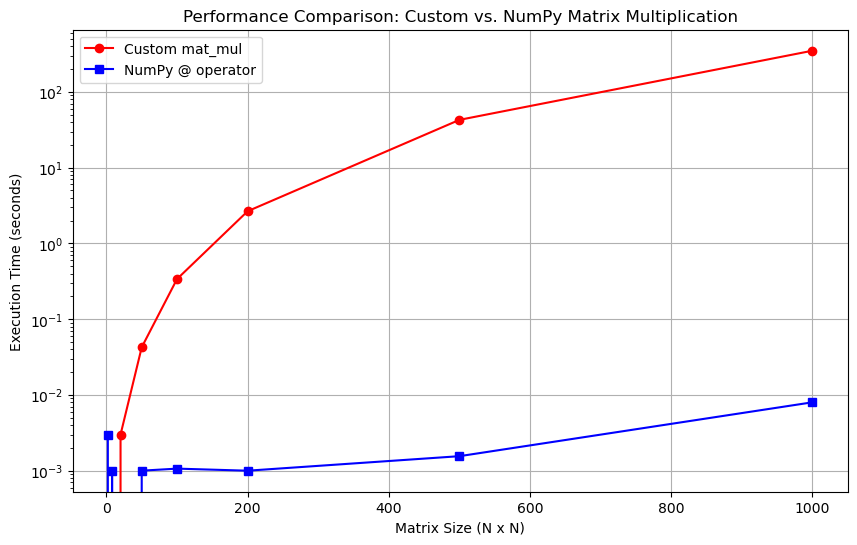

In [7]:
# Your code for Optional Exercise 4 here
sizes = [2,5,8,10,20,50,100,200,500,1000]
times_custom = []
times_numpy = []

for size in sizes:
    print(f"Testing size: {size}x{size}")
    A = np.random.rand(size, size)
    B = np.random.rand(size, size)
    
    # Time custom function
    start = time.time()
    mat_mul(A, B)
    end = time.time()
    times_custom.append(end - start)
    
    # Time NumPy
    start = time.time()
    A @ B
    end = time.time()
    times_numpy.append(end - start)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, times_custom, 'r-o', label='Custom mat_mul')
plt.plot(sizes, times_numpy, 'b-s', label='NumPy @ operator')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison: Custom vs. NumPy Matrix Multiplication')
plt.legend()
plt.grid(True)
plt.yscale('log') # Use a logarithmic scale for the y-axis to see both lines clearly
plt.show()

### 数字图像中的线性代数

type of img_color: <class 'numpy.ndarray'>


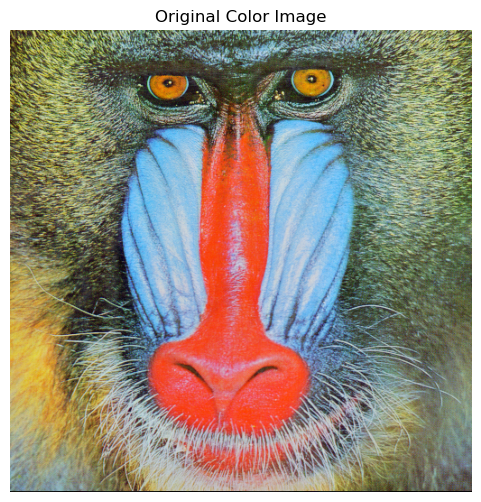

Image data type: uint8
Image shape: (512, 512, 3)


In [11]:
# 标准测试图像的URL（Mandrill/Baboon）
url = 'http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.03'

# 尝试下载图像并加载为NumPy数组
try:
    # 使用urllib打开URL连接
    with urllib.request.urlopen(url) as url_response:
        # 对于这些特定文件，有时需要指定'tiff'格式提示
        img_color = mpimg.imread(url_response, format='tiff')
        print(f"type of img_color: {type(img_color)}") # 得到的是一个 numpy.ndarray

        # 创建6x6英寸大小的图形
        plt.figure(figsize=(6, 6))
        # 显示彩色图像
        plt.imshow(img_color)
        # 设置标题
        plt.title("Original Color Image")
        # 关闭坐标轴以获得更清晰的视图
        plt.axis('off')
        # 显示图像
        plt.show()

        # 打印图像数据类型
        print(f"Image data type: {img_color.dtype}")
        # 打印图像形状
        print(f"Image shape: {img_color.shape}")

# 异常处理块
except Exception as e:
    # 打印下载或加载失败的错误信息
    print(f"下载或加载图像失败。错误信息: {e}")
    print("请检查网络连接或URL地址。")

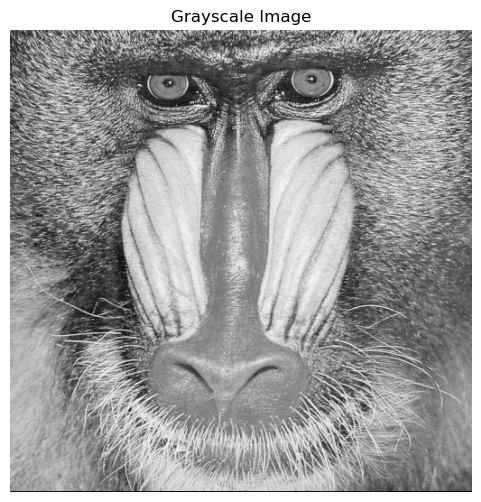

Grayscale image shape: (512, 512)


In [13]:
# 将彩色图像转换为灰度图：通过平均RGB通道的颜色值
# 最后一个轴（axis=2）对应R、G、B三个颜色通道
img_gray = np.mean(img_color, axis=2)

# 显示灰度图像
plt.figure(figsize=(6, 6))

# 关键点：必须将颜色映射（'cmap'）指定为'gray'
# 否则matplotlib会使用默认颜色映射（如'viridis'）
# 导致显示效果类似"热力图"而非真正的灰度图
plt.imshow(img_gray, cmap='gray')

plt.title("Grayscale Image")
plt.axis('off')
plt.show()

print(f"Grayscale image shape: {img_gray.shape}")

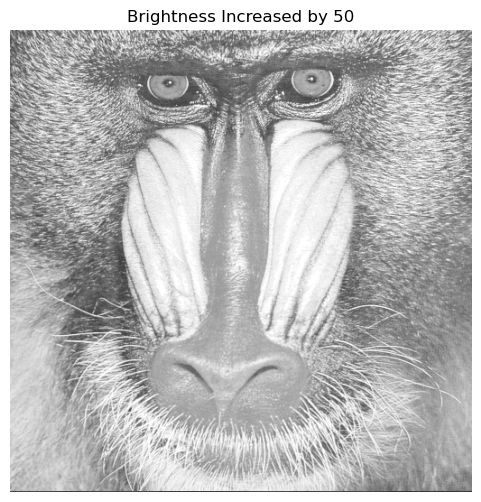

In [14]:
# 将每个像素值增加50以提高亮度
brightness_increase = 50
bright_image = img_gray + brightness_increase

# 裁剪像素值确保保持在有效范围[0,255]内
bright_image = np.clip(bright_image, 0, 255)

# 显示增亮后的图像
plt.figure(figsize=(6, 6))
# 使用vmin和vmax确保不同图像间的亮度缩放保持一致
plt.imshow(bright_image, cmap='gray', vmin=0, vmax=255)
plt.title(f"Brightness Increased by {brightness_increase}")
plt.axis('off')
plt.show()

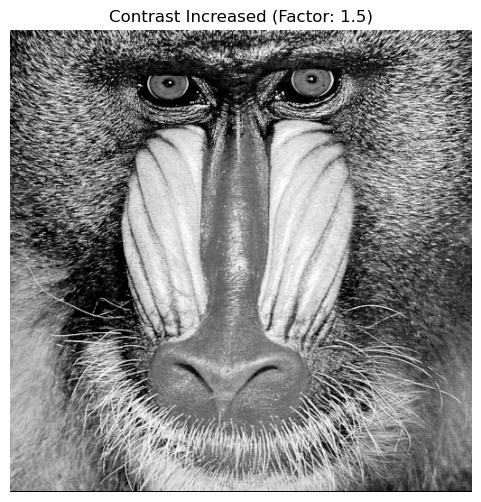

In [15]:
# 乘以1.5的系数以增加对比度
contrast_factor = 1.5

# 将像素值中心化到0附近，进行缩放，然后平移回原范围
high_contrast = (img_gray - 128) * contrast_factor + 128

# 裁剪像素值确保保持在有效范围[0,255]内
high_contrast = np.clip(high_contrast, 0, 255)

# 显示高对比度图像
plt.figure(figsize=(6, 6))
plt.imshow(high_contrast, cmap='gray', vmin=0, vmax=255)
plt.title(f"Contrast Increased (Factor: {contrast_factor})")
plt.axis('off')
plt.show()

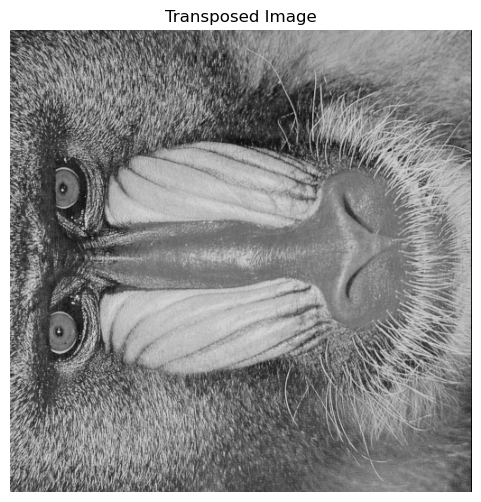

Original shape: (512, 512)
Transposed shape: (512, 512)


In [16]:
# 对图像矩阵进行转置操作
transposed_image = img_gray.T

# 显示转置后的图像
plt.figure(figsize=(6, 6))
plt.imshow(transposed_image, cmap='gray', vmin=0, vmax=255)
plt.title("Transposed Image")
plt.axis('off')
plt.show()

print(f"Original shape: {img_gray.shape}")
print(f"Transposed shape: {transposed_image.shape}")